In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import datetime as dt

In [2]:
#print("/Accident data/US_Accidents_Dec19.csv")
accidents_source=pd.read_csv("Accident data/US_Accidents_Dec19.csv")

In [3]:
accidents_source.size

145742415

In [4]:
accidents_source.shape

(2974335, 49)

In [5]:
accidents_source.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
accidents_source.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
accidents_source.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [8]:
#accidents_source[["Start Date","Start Time"]]=accidents_source["Start_Time"].str.split(expand=True)

In [9]:
#accidents_source[["End Date","End Time"]]=accidents_source["End_Time"].str.split(expand=True)

In [10]:
target_columns=['Severity','Start_Time','End_Time','Start_Lat', 'Start_Lng','City', 'State',\
                'Zipcode', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',\
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)','Precipitation(in)', 'Weather_Condition','Sunrise_Sunset']
accident_target=accidents_source.loc[accidents_source['Start_Time']>='2016-12-01'][target_columns].reset_index(drop=True)
accident_target.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset
0,2,2016-12-01 00:19:29,2016-12-01 01:04:07,38.481644,-121.334816,Sacramento,CA,95829-9422,37.4,NaN,100.0,30.09,0.8,Calm,NaN,NaN,NaN,Night
1,2,2016-12-01 01:11:30,2016-12-01 01:41:13,37.421124,-122.092476,Mountain View,CA,94043,46.9,NaN,90.0,30.13,10.0,WSW,3.5,NaN,Clear,Night
2,3,2016-12-01 01:36:51,2016-12-01 02:21:42,37.789349,-122.254303,Oakland,CA,94606,46.9,NaN,90.0,30.11,10.0,ESE,5.8,NaN,Mostly Cloudy,Night
3,2,2016-12-01 01:34:28,2016-12-01 02:21:01,37.257954,-122.093964,Saratoga,CA,95070-9704,48.0,NaN,83.0,30.11,10.0,Calm,NaN,NaN,Clear,Night
4,2,2016-12-01 01:45:02,2016-12-01 02:14:14,38.004459,-122.038872,Concord,CA,94520,44.1,NaN,82.0,30.07,9.0,Calm,NaN,NaN,Clear,Night


In [11]:
accident_target["Start_Time"]=pd.to_datetime(accident_target["Start_Time"],format='%Y-%m-%d %H:%M:%S.%f')

In [12]:
accident_target["Start_Year"]=accident_target["Start_Time"].dt.year

#accident_target.head()

In [13]:
#accident_target["Start_Time"].dt.month
accident_target["Season"]=np.select(
    [
        (accident_target["Start_Time"].dt.month== 12) | (accident_target["Start_Time"].dt.month== 1)| (accident_target["Start_Time"].dt.month== 2), 
        (accident_target["Start_Time"].dt.month== 3) | (accident_target["Start_Time"].dt.month== 4)| (accident_target["Start_Time"].dt.month== 5),
        (accident_target["Start_Time"].dt.month== 6) | (accident_target["Start_Time"].dt.month== 7)| (accident_target["Start_Time"].dt.month== 8),
        (accident_target["Start_Time"].dt.month== 9) | (accident_target["Start_Time"].dt.month== 10)| (accident_target["Start_Time"].dt.month== 11)
        
    ], 
    [
        'Winter', 
        'Spring',
        'Summer',
        'Fall'
    ], 
    default='Unknown'
)

In [14]:
accident_target.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Start_Year,Season
0,2,2016-12-01 00:19:29,2016-12-01 01:04:07,38.481644,-121.334816,Sacramento,CA,95829-9422,37.4,NaN,100.0,30.09,0.8,Calm,NaN,NaN,NaN,Night,2016,Winter
1,2,2016-12-01 01:11:30,2016-12-01 01:41:13,37.421124,-122.092476,Mountain View,CA,94043,46.9,NaN,90.0,30.13,10.0,WSW,3.5,NaN,Clear,Night,2016,Winter
2,3,2016-12-01 01:36:51,2016-12-01 02:21:42,37.789349,-122.254303,Oakland,CA,94606,46.9,NaN,90.0,30.11,10.0,ESE,5.8,NaN,Mostly Cloudy,Night,2016,Winter
3,2,2016-12-01 01:34:28,2016-12-01 02:21:01,37.257954,-122.093964,Saratoga,CA,95070-9704,48.0,NaN,83.0,30.11,10.0,Calm,NaN,NaN,Clear,Night,2016,Winter
4,2,2016-12-01 01:45:02,2016-12-01 02:14:14,38.004459,-122.038872,Concord,CA,94520,44.1,NaN,82.0,30.07,9.0,Calm,NaN,NaN,Clear,Night,2016,Winter


In [15]:
accident_target.to_csv("TargetData/us_accident_clean.csv")

In [17]:
accident_state_year=pd.DataFrame(accident_target[accident_target["Start_Time"]>='2017-01-01']\
                                 .groupby(["State","Start_Year"])["Start_Time"].count())\
.sort_values("Start_Time",ascending=False).reset_index()
#,columns=["State","Year","Accident Count"])
#.sort_values("Accident Count",ascending=False).reset_index()
accident_state_year.columns=["State","Year","Accident Count"]

#accident_state_year=accident_state_year

accident_state_year[["State","Year","Accident Count"]]

accident_state_year[accident_state_year["State"].isin(['CA'])]

,State,Year,Accident Count
0,CA,2019,213307
1,CA,2018,156777
2,CA,2017,152664


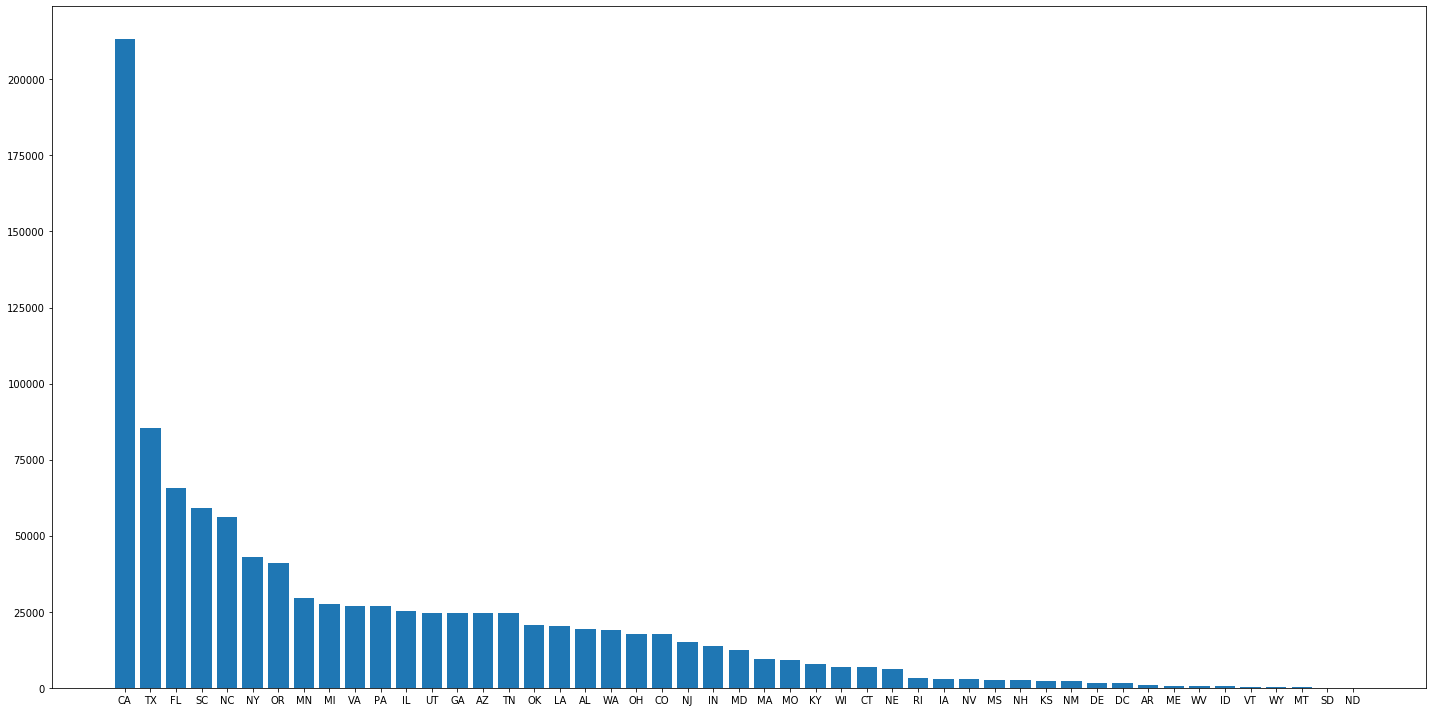

In [80]:
plt.figure(figsize=(20,10))
_=plt.bar(accident_state_year["State"],accident_state_year["Accident Count"])
plt.tight_layout()
plt.savefig("Images/AccidentsByState.png")

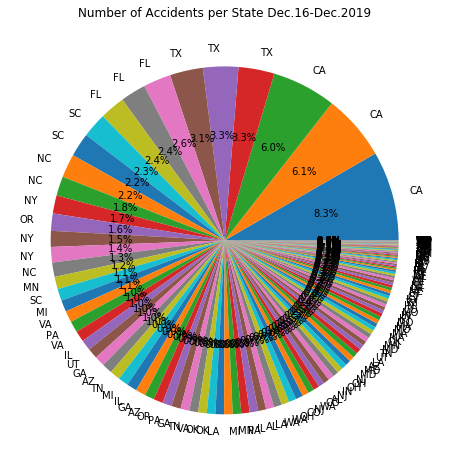

In [81]:
#Presenting the number of accidents per state in a pie chart.
plt.figure(figsize=(10, 8))
plt.title("Number of Accidents per State Dec.16-Dec.2019")
#explode = (0.1)
plt.pie(accident_state_year["Accident Count"], labels=accident_state_year["State"],autopct="%1.1f%%")
plt.savefig("Images/AccidentsByStatePie.png")
plt.show()

In [24]:
states=[]
states.extend(list(accident_state_year.groupby("State")["Accident Count"].sum().nlargest(3).index.values))

states.extend(list(accident_state_year.groupby("State")["Accident Count"].sum().nsmallest(3).index.values))

states.append('NY')
print(states)

['CA', 'TX', 'FL', 'ND', 'SD', 'WY', 'NY']


In [25]:
accident_state_year_2017=accident_state_year[(accident_state_year["State"].isin(states)) & (accident_state_year["Year"]==2017)]
accident_state_year_2017


,State,Year,Accident Count
2,CA,2017,152664
3,TX,2017,85542
7,FL,2017,60669
16,NY,2017,36878
139,WY,2017,112
145,SD,2017,12
146,ND,2017,4


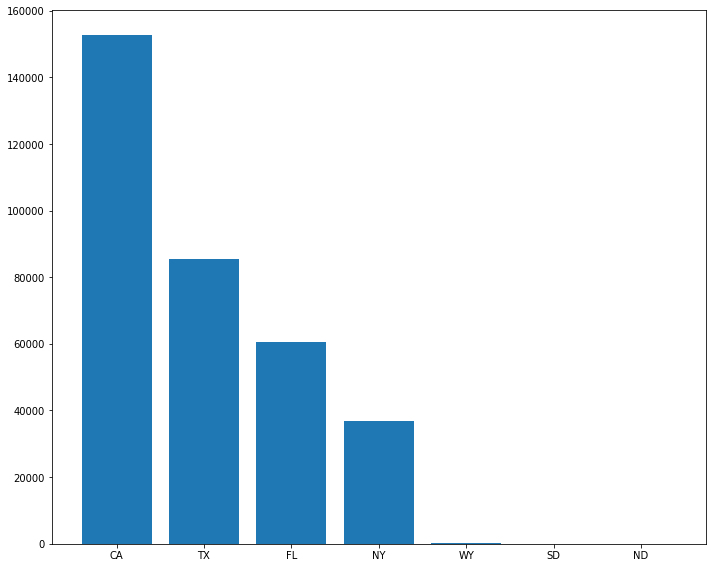

In [82]:
plt.figure(figsize=(10,8))
_=plt.bar(accident_state_year_2017["State"],accident_state_year_2017["Accident Count"])
plt.tight_layout()
plt.savefig("Images/StatesWithMostAcc.png")

In [27]:
# Extract years of interest and get number of accidents for each year
target_years = accident_target[(accident_target["Start_Year"] >= 2017) & (accident_target["Start_Year"] < 2020)]
yearly_accidents = target_years.groupby("Start_Year")
yearly_counts = yearly_accidents["Start_Year"].count()
yearly_counts

Start_Year
2017    717483
2018    892615
2019    953630
Name: Start_Year, dtype: int64

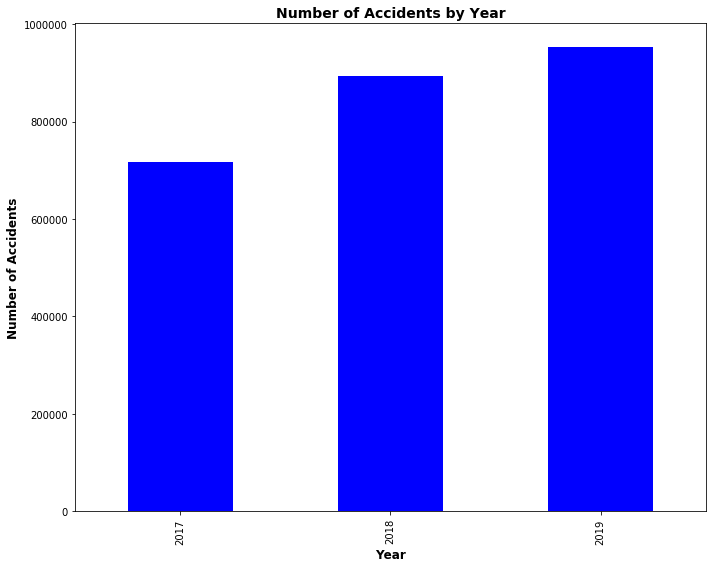

In [28]:
# Plot the number of accidents by year
accident_count = yearly_counts.plot(kind="bar", color="blue", figsize=(10,8))
plt.title("Number of Accidents by Year", fontweight="bold", fontsize=14)
plt.xlabel("Year", fontweight='bold', fontsize=12)
plt.ylabel("Number of Accidents", fontweight='bold', fontsize=12)

# Save image and show graph
plt.savefig("Images/AccidentsByYear.png")
plt.tight_layout()
plt.show();

In [29]:
# Get severity counts by year
severity_counts = yearly_accidents["Severity"].value_counts()
severity_counts = severity_counts.to_frame()
severity_by_year = severity_counts.rename(columns= {severity_counts.columns[0]: "Severity Count"})
severity_by_year.reset_index(inplace=True)
severity_by_year

,Start_Year,Severity,Severity Count
0,2017,2,461971
1,2017,3,231081
2,2017,4,24149
3,2017,1,282
4,2018,2,574016
5,2018,3,292570
6,2018,4,25770
7,2018,1,259
8,2019,2,687573
9,2019,3,237790


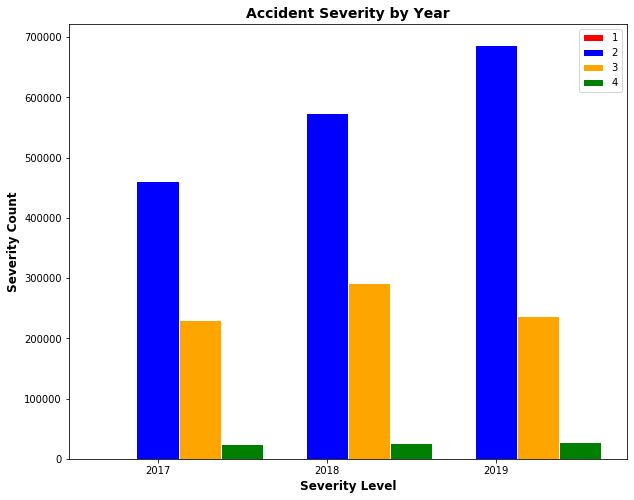

In [31]:
# Create plot to compare accident severity levels by year
plt.figure(figsize=(10, 8))
barWidth = 0.25

# Set height of bar
y1 = severity_by_year[severity_by_year["Severity"]==1]["Severity Count"].to_list()
y2 = severity_by_year[severity_by_year["Severity"]==2]["Severity Count"].to_list()
y3 = severity_by_year[severity_by_year["Severity"]==3]["Severity Count"].to_list()
y4 = severity_by_year[severity_by_year["Severity"]==4]["Severity Count"].to_list()

# Set position of bar on X axis
x1 = np.arange(len(y1))
x2 = [x + barWidth for x in x1]
x3 = [x + barWidth for x in x2]
x4 = [x + barWidth for x in x3]
 
# Make the plot
plt.bar(x1, y1, color="r", width=barWidth, edgecolor="white", label="1")
plt.bar(x2, y2, color="b", width=barWidth, edgecolor="white", label="2")
plt.bar(x3, y3, color="orange", width=barWidth, edgecolor="white", label="3")
plt.bar(x4, y4, color="g", width=barWidth, edgecolor="white", label="4")
 
# Add xticks and lables
plt.title("Accident Severity by Year", fontweight="bold", fontsize=14)
plt.xlabel("Severity Level", fontweight="bold", fontsize=12)
plt.ylabel("Severity Count", fontweight="bold", fontsize=12)
plt.xticks([r + barWidth for r in range(len(y1))], ["2017", "2018", "2019"])
 
# Create legend, save image and show graph
plt.legend()
plt.savefig("Images/SeverityByYear.png")
plt.show();


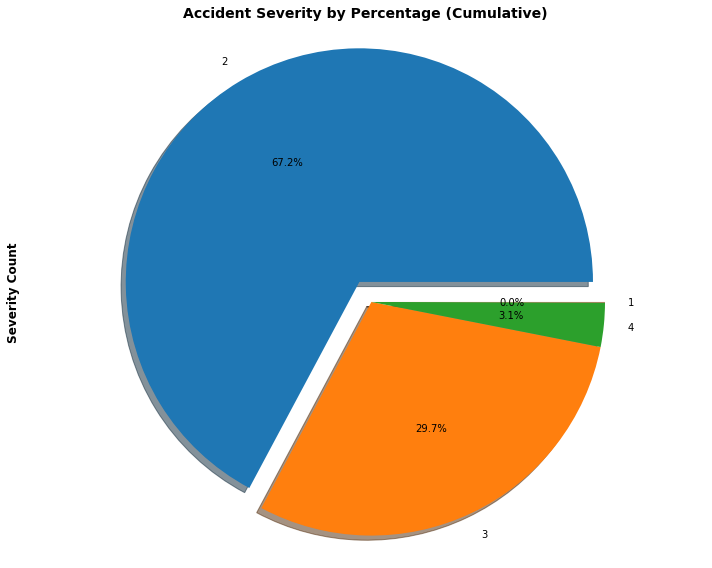

In [33]:
# Create a pie chart to showcase the percentage of each severity 
plt.figure(figsize=(10, 8))
accident_target["Severity"].value_counts().plot.pie(explode=[0.1,0,0,0],autopct="%1.1f%%",shadow=True)
plt.title("Accident Severity by Percentage (Cumulative)", fontweight="bold", fontsize=14)
plt.ylabel("Severity Count",fontweight="bold", fontsize=12)
plt.axis("equal")

# Save image and show graph
plt.savefig("Images/TotalSeverity.png")
plt.tight_layout()
plt.show()

# Time Analysis

In [34]:
accident_target.count()

Severity             2623302
Start_Time           2623302
End_Time             2623302
Start_Lat            2623302
Start_Lng            2623302
City                 2623244
State                2623302
Zipcode              2622516
Temperature(F)       2572734
Wind_Chill(F)        1104925
Humidity(%)          2570090
Pressure(in)         2579648
Visibility(mi)       2564745
Wind_Direction       2581129
Wind_Speed(mph)      2248405
Precipitation(in)     947119
Weather_Condition    2564660
Sunrise_Sunset       2623235
Start_Year           2623302
Season               2623302
dtype: int64

In [35]:
#Calling the initial data and creating a new dataFrame
accident_target["Start_Year"]=accident_target["Start_Time"].dt.year
accident_target["Start_Month"]=accident_target["Start_Time"].dt.month
accident_target["Start_Date_Only"]=accident_target["Start_Time"].dt.date

In [40]:
accident_target.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Wind_Chill(F),...,Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Start_Year,Season,Start_Month,Start_Date_Only
0,2,2016-12-01 00:19:29,2016-12-01 01:04:07,38.481644,-121.334816,Sacramento,CA,95829-9422,37.4,NaN,...,0.8,Calm,NaN,NaN,NaN,Night,2016,Winter,12,2016-12-01
1,2,2016-12-01 01:11:30,2016-12-01 01:41:13,37.421124,-122.092476,Mountain View,CA,94043,46.9,NaN,...,10.0,WSW,3.5,NaN,Clear,Night,2016,Winter,12,2016-12-01
2,3,2016-12-01 01:36:51,2016-12-01 02:21:42,37.789349,-122.254303,Oakland,CA,94606,46.9,NaN,...,10.0,ESE,5.8,NaN,Mostly Cloudy,Night,2016,Winter,12,2016-12-01
3,2,2016-12-01 01:34:28,2016-12-01 02:21:01,37.257954,-122.093964,Saratoga,CA,95070-9704,48.0,NaN,...,10.0,Calm,NaN,NaN,Clear,Night,2016,Winter,12,2016-12-01
4,2,2016-12-01 01:45:02,2016-12-01 02:14:14,38.004459,-122.038872,Concord,CA,94520,44.1,NaN,...,9.0,Calm,NaN,NaN,Clear,Night,2016,Winter,12,2016-12-01


In [39]:
#Creating df for each year to evaluate the number of accidents for each month in each year
accidents_2016_df = accident_target.loc[accident_target['Start_Year']==2016].sort_values(by='Start_Month', ascending=True)
accidents_2017_df = accident_target.loc[accident_target['Start_Year']==2017].sort_values(by='Start_Month', ascending=True)
accidents_2018_df = accident_target.loc[accident_target['Start_Year']==2018].sort_values(by='Start_Month', ascending=True)
accidents_2019_df = accident_target.loc[accident_target['Start_Year']==2019].sort_values(by='Start_Month', ascending=True)
accidents_2016_df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Wind_Chill(F),...,Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Start_Year,Season,Start_Month,Start_Date_Only
0,2,2016-12-01 00:19:29,2016-12-01 01:04:07,38.481644,-121.334816,Sacramento,CA,95829-9422,37.4,NaN,...,0.8,Calm,NaN,NaN,NaN,Night,2016,Winter,12,2016-12-01
71865,2,2016-12-02 17:14:20,2016-12-02 17:59:06,47.684433,-117.414986,Spokane,WA,99205-3177,37.0,31.6,...,9.0,SSW,6.9,0.00,Light Rain,Night,2016,Winter,12,2016-12-02
71866,2,2016-12-02 17:23:59,2016-12-02 18:08:33,47.369980,-122.286919,Kent,WA,98032-5654,46.0,40.2,...,3.0,SW,12.7,0.02,Light Rain,Night,2016,Winter,12,2016-12-02
71867,3,2016-12-02 17:37:07,2016-12-02 18:21:41,47.821156,-122.279182,Lynnwood,WA,98036,45.0,37.4,...,6.0,South,18.4,0.01,Light Rain,Night,2016,Winter,12,2016-12-02
71868,3,2016-12-02 17:36:19,2016-12-02 18:20:53,47.580242,-122.174667,Bellevue,WA,98006,46.9,NaN,...,1.8,SE,4.6,0.00,Light Rain,Night,2016,Winter,12,2016-12-02


In [42]:
accidents_per_month_2016 = accidents_2016_df.groupby(accidents_2016_df['Start_Month']).count()
accidents_per_month_2017 = accidents_2017_df.groupby(accidents_2017_df['Start_Month']).count()
accidents_per_month_2018 = accidents_2018_df.groupby(accidents_2018_df['Start_Month']).count()
accidents_per_month_2019 = accidents_2019_df.groupby(accidents_2019_df['Start_Month']).count()
accidents_per_month_2019.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Wind_Chill(F),...,Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Start_Year,Season,Start_Date_Only
Start_Month,,,,,,,,,,,,,,,,,,,,,
1,79275,79275,79275,79275,79275,79274,79275,79259,77890,37198,...,78037,77675,78402,63039,13653,77572,79274,79275,79275,79275
2,74556,74556,74556,74556,74556,74554,74556,74530,73458,34181,...,73636,73113,73867,60960,18946,73105,74553,74556,74556,74556
3,69396,69396,69396,69396,69396,69395,69396,69370,68382,22671,...,68546,68103,68770,56909,8933,68068,69395,69396,69396,69396
4,73000,73000,73000,73000,73000,72998,73000,72967,72266,71682,...,72409,72172,71833,71837,70258,72216,72998,73000,73000,73000
5,73868,73868,73868,73868,73868,73867,73868,73840,72980,72326,...,73098,72831,72466,72466,70837,72879,73867,73868,73868,73868


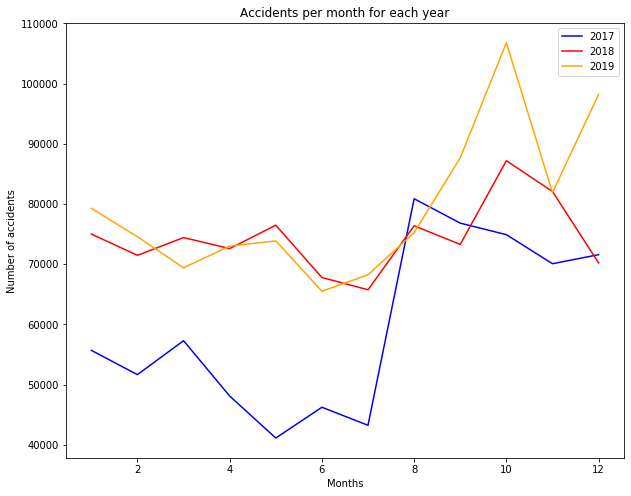

In [83]:
#Plot will show distribution of accidents for each year
#List of months
months = [1,2,3,4,5,6,7,8,9,10,11,12]
month = [12]
#Plotting the number of accidents per month for each year
#plt.plot(month, accidents_per_month_2016['Start_Date_Only'], color="green", label="2016")
plt.figure(figsize=(10, 8))
plt.plot(months, accidents_per_month_2017['Start_Date_Only'], color="blue", label="2017")
plt.plot(months, accidents_per_month_2018['Start_Date_Only'], color="red", label="2018")
plt.plot(months, accidents_per_month_2019['Start_Date_Only'], color="orange", label="2019")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Accidents per month for each year")
plt.xlabel("Months")
plt.ylabel("Number of accidents")
plt.savefig("Images/AccidentsPerMonthLine.png")

# Print our chart to the screen
plt.show();

In [46]:
#Creating df for California and NY to evaluate the number of accidents for each month in each year
#California
accidents_CA_2016_df = accident_target.loc[(accident_target['State']=='CA') & (accident_target['Start_Year']==2016)].sort_values(by='Start_Month', ascending=True)
accidents_CA_2017_df = accident_target.loc[(accident_target['State']=='CA') & (accident_target['Start_Year']==2017)].sort_values(by='Start_Month', ascending=True)
accidents_CA_2018_df = accident_target.loc[(accident_target['State']=='CA') & (accident_target['Start_Year']==2018)].sort_values(by='Start_Month', ascending=True)
accidents_CA_2019_df = accident_target.loc[(accident_target['State']=='CA') & (accident_target['Start_Year']==2019)].sort_values(by='Start_Month', ascending=True)

accidents_CA_2019_df.head()

#New York
accidents_NY_2016_df = accident_target.loc[(accident_target['State']=='NY') & (accident_target['Start_Year']==2016)].sort_values(by='Start_Month', ascending=True)
accidents_NY_2017_df = accident_target.loc[(accident_target['State']=='NY') & (accident_target['Start_Year']==2017)].sort_values(by='Start_Month', ascending=True)
accidents_NY_2018_df = accident_target.loc[(accident_target['State']=='NY') & (accident_target['Start_Year']==2018)].sort_values(by='Start_Month', ascending=True)
accidents_NY_2019_df = accident_target.loc[(accident_target['State']=='NY') & (accident_target['Start_Year']==2019)].sort_values(by='Start_Month', ascending=True)

accidents_NY_2019_df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Wind_Chill(F),...,Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Start_Year,Season,Start_Month,Start_Date_Only
958857,2,2019-01-29 11:37:18,2019-01-29 12:06:57,41.297817,-73.935936,Cortlandt Manor,NY,10567-7300,33.1,24.9,...,9.0,ESE,10.4,0.0,Overcast,Day,2019,Winter,1,2019-01-29
952177,2,2019-01-25 04:56:00,2019-01-25 05:25:20,40.752480,-73.852135,Corona,NY,11368,35.1,25.9,...,10.0,WNW,13.8,NaN,Mostly Cloudy,Night,2019,Winter,1,2019-01-25
952180,2,2019-01-25 05:52:23,2019-01-25 06:22:15,40.692070,-73.765289,Saint Albans,NY,11412-4025,34.0,26.0,...,10.0,West,10.4,NaN,Mostly Cloudy,Night,2019,Winter,1,2019-01-25
952181,2,2019-01-25 05:52:47,2019-01-25 06:22:30,41.054260,-73.809792,Elmsford,NY,10523,32.0,24.8,...,10.0,West,8.1,NaN,Mostly Cloudy,Night,2019,Winter,1,2019-01-25
952182,2,2019-01-25 05:58:20,2019-01-25 06:28:05,40.750229,-73.855141,Corona,NY,11368-2634,35.1,29.3,...,10.0,West,6.9,NaN,Overcast,Night,2019,Winter,1,2019-01-25


In [47]:
#Grouping by month for California and counting accidents
accidents_per_month_2016_CA = accidents_CA_2016_df.groupby(accidents_CA_2016_df['Start_Month']).count()
accidents_per_month_2017_CA = accidents_CA_2017_df.groupby(accidents_CA_2017_df['Start_Month']).count()
accidents_per_month_2018_CA = accidents_CA_2018_df.groupby(accidents_CA_2018_df['Start_Month']).count()
accidents_per_month_2019_CA = accidents_CA_2019_df.groupby(accidents_CA_2019_df['Start_Month']).count()
accidents_per_month_2019_CA

#Grouping by month for NY and counting accidents
accidents_per_month_2016_NY = accidents_NY_2016_df.groupby(accidents_NY_2016_df['Start_Month']).count()
accidents_per_month_2017_NY = accidents_NY_2017_df.groupby(accidents_NY_2017_df['Start_Month']).count()
accidents_per_month_2018_NY = accidents_NY_2018_df.groupby(accidents_NY_2018_df['Start_Month']).count()
accidents_per_month_2019_NY = accidents_NY_2019_df.groupby(accidents_NY_2019_df['Start_Month']).count()
accidents_per_month_2019_NY.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Wind_Chill(F),...,Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Start_Year,Season,Start_Date_Only
Start_Month,,,,,,,,,,,,,,,,,,,,,
1,3510,3510,3510,3510,3510,3510,3510,3510,3502,3010,...,3507,3503,3508,3140,944,3507,3510,3510,3510,3510
2,3796,3796,3796,3796,3796,3796,3796,3796,3792,3089,...,3796,3766,3796,3299,1105,3794,3796,3796,3796,3796
3,3354,3354,3354,3354,3354,3354,3354,3354,3349,2294,...,3350,3348,3350,2888,691,3347,3354,3354,3354,3354
4,3776,3776,3776,3776,3776,3776,3776,3776,3757,3699,...,3775,3771,3716,3716,3775,3771,3776,3776,3776,3776
5,4262,4262,4262,4262,4262,4262,4262,4262,4256,4204,...,4257,4251,4204,4204,4259,4253,4262,4262,4262,4262


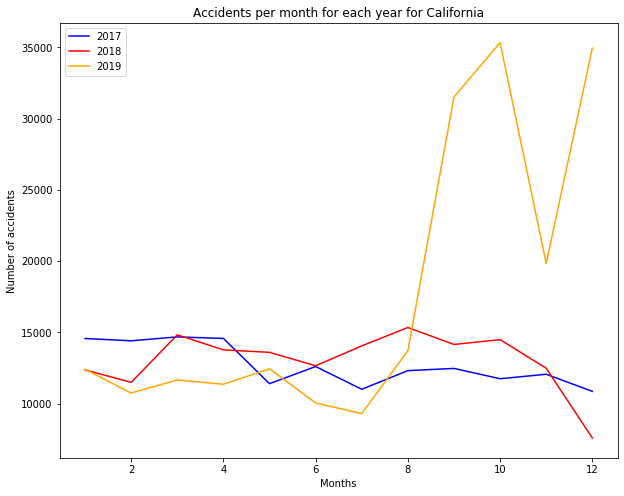

In [84]:
#Plot will show distribution of accidents for each year in California
#List of months
months = [1,2,3,4,5,6,7,8,9,10,11,12]
month = [12]
#Plotting the number of accidents per month for each year
#plt.plot(month, accidents_per_month_2016['Start_Date_Only'], color="green", label="2016")
plt.figure(figsize=(10, 8))
plt.plot(months, accidents_per_month_2017_CA['Start_Date_Only'], color="blue", label="2017")
plt.plot(months, accidents_per_month_2018_CA['Start_Date_Only'], color="red", label="2018")
plt.plot(months, accidents_per_month_2019_CA['Start_Date_Only'], color="orange", label="2019")


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Accidents per month for each year for California")
plt.xlabel("Months")
plt.ylabel("Number of accidents")
plt.savefig("Images/AccidentsPerMonthLineCAL.png")

# Print our chart to the screen
plt.show();

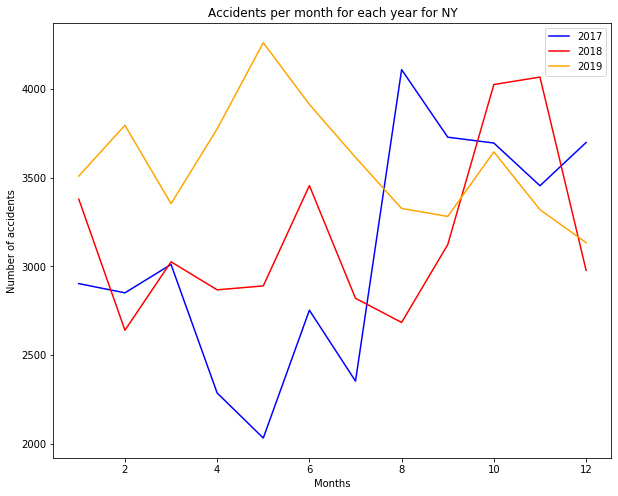

In [85]:
#Plot will show distribution of accidents for each year in New York
#List of months
months = [1,2,3,4,5,6,7,8,9,10,11,12]
month = [12]
#Plotting the number of accidents per month for each year
#plt.plot(month, accidents_per_month_2016['Start_Date_Only'], color="green", label="2016")
plt.figure(figsize=(10, 8))
plt.plot(months, accidents_per_month_2017_NY['Start_Date_Only'], color="blue", label="2017")
plt.plot(months, accidents_per_month_2018_NY['Start_Date_Only'], color="red", label="2018")
plt.plot(months, accidents_per_month_2019_NY['Start_Date_Only'], color="orange", label="2019")


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Accidents per month for each year for NY")
plt.xlabel("Months")
plt.ylabel("Number of accidents")
plt.savefig("Images/AccidentsPerMonthLineNY.png")

# Print our chart to the screen
plt.show()

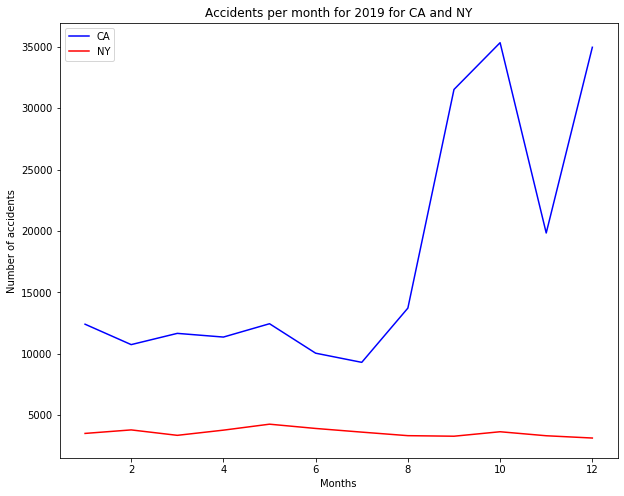

In [86]:
#Plot will show distribution of accidents for California and for New York in the year 2019
#List of months
months = [1,2,3,4,5,6,7,8,9,10,11,12]

#Plotting the number of accidents per month for California in 2019
plt.figure(figsize=(10, 8))
plt.plot(months, accidents_per_month_2019_CA['Start_Date_Only'], color="blue", label="CA")

#Plotting the number of accidents per month for New York in 2018
plt.plot(months, accidents_per_month_2019_NY['Start_Date_Only'], color="red", label="NY")



# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Accidents per month for 2019 for CA and NY")
plt.xlabel("Months")
plt.ylabel("Number of accidents")
plt.savefig("Images/AccidentsPerMonthLineNYca2019_.png")

# Print our chart to the screen
plt.show()

In [57]:
#Calling the initial data and creating a new column for hour
accident_target["Hour"]=accident_target["Start_Time"].dt.hour
accident_target.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Wind_Chill(F),...,Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Start_Year,Season,Start_Month,Start_Date_Only,Hour
0,2,2016-12-01 00:19:29,2016-12-01 01:04:07,38.481644,-121.334816,Sacramento,CA,95829-9422,37.4,NaN,...,Calm,NaN,NaN,NaN,Night,2016,Winter,12,2016-12-01,0
1,2,2016-12-01 01:11:30,2016-12-01 01:41:13,37.421124,-122.092476,Mountain View,CA,94043,46.9,NaN,...,WSW,3.5,NaN,Clear,Night,2016,Winter,12,2016-12-01,1
2,3,2016-12-01 01:36:51,2016-12-01 02:21:42,37.789349,-122.254303,Oakland,CA,94606,46.9,NaN,...,ESE,5.8,NaN,Mostly Cloudy,Night,2016,Winter,12,2016-12-01,1
3,2,2016-12-01 01:34:28,2016-12-01 02:21:01,37.257954,-122.093964,Saratoga,CA,95070-9704,48.0,NaN,...,Calm,NaN,NaN,Clear,Night,2016,Winter,12,2016-12-01,1
4,2,2016-12-01 01:45:02,2016-12-01 02:14:14,38.004459,-122.038872,Concord,CA,94520,44.1,NaN,...,Calm,NaN,NaN,Clear,Night,2016,Winter,12,2016-12-01,1


In [58]:
#Grouping by hour and counting accidents for the whole dataset
accidents_per_hour = accident_target.groupby(accident_target['Hour']).count()
accidents_per_hour.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Wind_Chill(F),...,Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Start_Year,Season,Start_Month,Start_Date_Only,Hour
Hour,,,,,,,,,,,,,,,,,,,,,
0,19440,19440,19440,19440,19440,19440,19440,19412,18873,8859,...,18988,14764,7860,18876,19434,19440,19440,19440,19440,19440
1,15085,15085,15085,15085,15085,15084,15085,15070,14695,6695,...,14797,11180,5783,14744,15084,15085,15085,15085,15085,15085
2,16171,16171,16171,16171,16171,16171,16171,16159,15743,7099,...,15863,11892,5941,15782,16171,16171,16171,16171,16171,16171
3,15690,15690,15690,15690,15690,15690,15690,15677,15320,6838,...,15439,11623,5761,15347,15690,15690,15690,15690,15690,15690
4,49109,49109,49109,49109,49109,49105,49109,49096,48019,23365,...,48258,37967,19940,47866,49105,49109,49109,49109,49109,49109


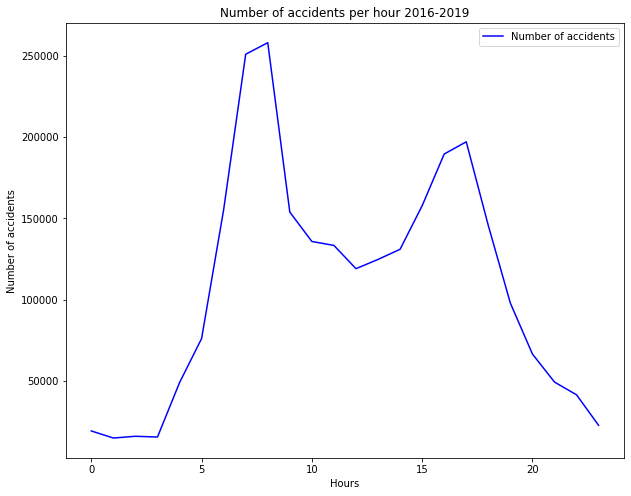

In [87]:
#Plot will show distribution of accidents throughout the hours of the day for the whole dataset
#List of hours
months = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

#Plotting the number of accidents per hour
plt.figure(figsize=(10, 8))
plt.plot(months, accidents_per_hour['Start_Date_Only'], color="blue", label="Number of accidents")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Number of accidents per hour 2016-2019")
plt.xlabel("Hours")
plt.ylabel("Number of accidents")
plt.savefig("Images/AccidentsPerHour.png")

# Print our chart to the screen
plt.show()

In [61]:
#Cresting the Dataframe with the whole data for CA, NY
accidents_CA = accident_target.loc[accident_target['State']=='CA']
accidents_NY = accident_target.loc[accident_target['State']=='NY']

In [62]:
#Grouping by month for California and counting accidents
accidents_per_hour_CA = accidents_CA.groupby(accidents_CA['Hour']).count()

#Grouping by month for NY and counting accidents
accidents_per_hour_NY = accidents_NY.groupby(accidents_NY['Hour']).count()

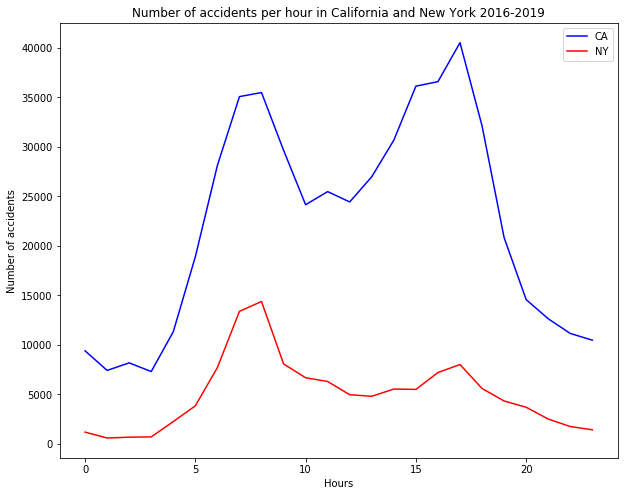

In [88]:
#Plot will show distribution of accidents throughout the hours of the day for California and New York
#List of hours
hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

#Plotting the number of accidents per hour in California
plt.figure(figsize=(10, 8))
plt.plot(hours, accidents_per_hour_CA['Start_Date_Only'], color="blue", label="CA")

#Plotting the number of accidents per hour in New York
plt.plot(hours, accidents_per_hour_NY['Start_Date_Only'], color="red", label="NY")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Number of accidents per hour in California and New York 2016-2019")
plt.xlabel("Hours")
plt.ylabel("Number of accidents")
plt.savefig("Images/AccidentsPerHourCALny.png")

# Print our chart to the screen
plt.show()

In [75]:
#Grouping by month for California and counting accidents
accidents_per_hour_2016_CA = accidents_CA_2016_df.groupby(accidents_CA_2016_df['Hour']).count()
accidents_per_hour_2017_CA = accidents_CA_2017_df.groupby(accidents_CA_2017_df['Hour']).count()
accidents_per_hour_2018_CA = accidents_CA_2018_df.groupby(accidents_CA_2018_df['Hour']).count()
accidents_per_hour_2019_CA = accidents_CA_2019_df.groupby(accidents_CA_2019_df['Hour']).count()
accidents_per_hour_2019_CA

#Grouping by month for NY and counting accidents
accidents_per_hour_2016_NY = accidents_NY_2016_df.groupby(accidents_NY_2016_df['Hour']).count()
accidents_per_hour_2017_NY = accidents_NY_2017_df.groupby(accidents_NY_2017_df['Hour']).count()
accidents_per_hour_2018_NY = accidents_NY_2018_df.groupby(accidents_NY_2018_df['Hour']).count()
accidents_per_hour_2019_NY = accidents_NY_2019_df.groupby(accidents_NY_2019_df['Hour']).count()
accidents_per_hour_2019_NY.head()

KeyError: 'Hour'

In [67]:
#Plot will show distribution of accidents throughout the hours of the day for California and New York in 2018
#List of hours
hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

#Plotting the number of accidents per hour in California
plt.plot(hours, accidents_per_hour_2018_CA['Start_Date_Only'], color="blue", label="CA")

#Plotting the number of accidents per hour in New York
plt.plot(hours, accidents_per_hour_2018_NY['Start_Date_Only'], color="red", label="NY")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Number of accidents per per hour 2018")
plt.xlabel("Hours")
plt.ylabel("Number of accidents")

# Print our chart to the screen
plt.show()

NameError: name 'accidents_per_hour_2018_CA' is not defined

# Weather Conditions

In [68]:
accident_target.count()

Severity             2623302
Start_Time           2623302
End_Time             2623302
Start_Lat            2623302
Start_Lng            2623302
City                 2623244
State                2623302
Zipcode              2622516
Temperature(F)       2572734
Wind_Chill(F)        1104925
Humidity(%)          2570090
Pressure(in)         2579648
Visibility(mi)       2564745
Wind_Direction       2581129
Wind_Speed(mph)      2248405
Precipitation(in)     947119
Weather_Condition    2564660
Sunrise_Sunset       2623235
Start_Year           2623302
Season               2623302
Start_Month          2623302
Start_Date_Only      2623302
Hour                 2623302
dtype: int64

In [74]:
#Grouping by weather condition and counting each condition
accidents_per_weather_condition = accident_target.groupby(accident_target['Weather_Condition']).count()
accidents_per_weather_condition_df = accidents_per_weather_condition.reset_index()
accidents_per_weather_condition_df.sort_values(by= 'Severity', ascending=False).head()

,Weather_Condition,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),...,Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Sunrise_Sunset,Start_Year,Season,Start_Month,Start_Date_Only,Hour
4,Clear,652972,652972,652972,652972,652972,652956,652972,652972,650830,...,650820,652963,499200,4053,652956,652972,652972,652972,652972,652972
71,Mostly Cloudy,366359,366359,366359,366359,366359,366354,366359,366359,365412,...,365913,365852,333013,114546,366353,366359,366359,366359,366359,366359
74,Overcast,340627,340627,340627,340627,340627,340624,340627,340627,339661,...,339188,340624,289642,49026,340624,340627,340627,340627,340627,340627
11,Fair,333090,333090,333090,333090,333090,333084,333090,333090,331665,...,332407,330175,330187,317163,333082,333090,333090,333090,333090,333090
77,Partly Cloudy,257764,257764,257764,257764,257764,257762,257764,257764,257050,...,257379,257046,234058,85317,257762,257764,257764,257764,257764,257764


In [71]:
#Removing Values with little occurance
accidents_per_weather_condition_clean = accidents_per_weather_condition_df.loc[accidents_per_weather_condition_df["Severity"]>=5000]
accidents_per_weather_condition_clean.head()

,Weather_Condition,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),...,Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Sunrise_Sunset,Start_Year,Season,Start_Month,Start_Date_Only,Hour
4,Clear,652972,652972,652972,652972,652972,652956,652972,652972,650830,...,650820,652963,499200,4053,652956,652972,652972,652972,652972,652972
5,Cloudy,115152,115152,115152,115152,115152,115148,115152,115152,114747,...,114872,114473,114473,111261,115148,115152,115152,115152,115152,115152
11,Fair,333090,333090,333090,333090,333090,333084,333090,333090,331665,...,332407,330175,330187,317163,333082,333090,333090,333090,333090,333090
13,Fog,21161,21161,21161,21161,21161,21161,21161,21161,21002,...,21135,21121,15958,10697,21161,21161,21161,21161,21161,21161
19,Haze,30427,30427,30427,30427,30427,30426,30427,30427,30154,...,30424,30380,23117,7283,30426,30427,30427,30427,30427,30427


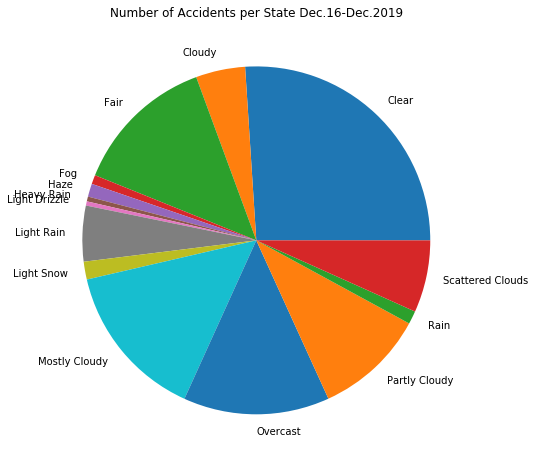

In [89]:
#Presenting the number of accidents per state in a pie chart.
plt.figure(figsize=(10, 8))
plt.title("Number of Accidents per State Dec.16-Dec.2019")
#explode = (0.1)
plt.pie(accidents_per_weather_condition_clean["Severity"],labels= accidents_per_weather_condition_clean['Weather_Condition'])
plt.savefig("Images/AccidentsByWeather.png")
plt.show()

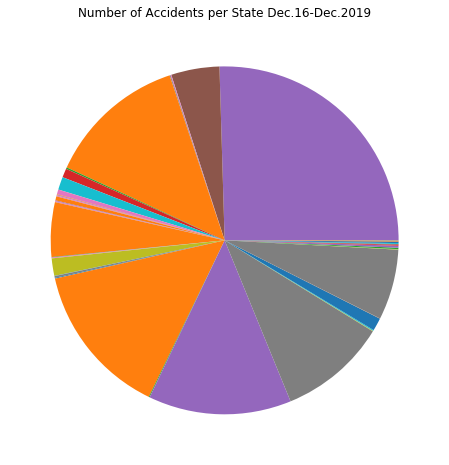

In [90]:
#Presenting the number of accidents per state in a pie chart.
plt.figure(figsize=(10, 8))
plt.title("Number of Accidents per State Dec.16-Dec.2019")
#explode = (0.1)
plt.pie(accidents_per_weather_condition_df["Severity"])
plt.savefig("Images/AccidentsPerState.png")
plt.show()

#Conditional Lables in pie chart from stack overflow
for ax, col in zip(axes.flat, df.columns):                                                             
    data = df[col]                                                                                     
    labels = [n if v > data.sum() * 0.2 else ''
              for n, v in zip(df.index, data)]                       

    ax.pie(data, autopct=my_autopct, colors=colors, labels=labels)